## Downloading the data


In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier 


In [2]:
import os


os.getcwd()
os.chdir("./Classification/")
my_data = pd.read_csv("drug200.csv", delimiter =",")
my_data



,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [3]:
dir(os)

['DirEntry',
 'F_OK',
 'MutableMapping',
 'O_APPEND',
 'O_BINARY',
 'O_CREAT',
 'O_EXCL',
 'O_NOINHERIT',
 'O_RANDOM',
 'O_RDONLY',
 'O_RDWR',
 'O_SEQUENTIAL',
 'O_SHORT_LIVED',
 'O_TEMPORARY',
 'O_TEXT',
 'O_TRUNC',
 'O_WRONLY',
 'P_DETACH',
 'P_NOWAIT',
 'P_NOWAITO',
 'P_OVERLAY',
 'P_WAIT',
 'PathLike',
 'R_OK',
 'SEEK_CUR',
 'SEEK_END',
 'SEEK_SET',
 'TMP_MAX',
 'W_OK',
 'X_OK',
 '_AddedDllDirectory',
 '_Environ',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_check_methods',
 '_execvpe',
 '_exists',
 '_exit',
 '_fspath',
 '_get_exports_list',
 '_putenv',
 '_unsetenv',
 '_wrap_close',
 'abc',
 'abort',
 'access',
 'add_dll_directory',
 'altsep',
 'chdir',
 'chmod',
 'close',
 'closerange',
 'cpu_count',
 'curdir',
 'defpath',
 'device_encoding',
 'devnull',
 'dup',
 'dup2',
 'environ',
 'error',
 'execl',
 'execle',
 'execlp',
 'execlpe',
 'execv',
 'execve',
 'execvp',
 'execvpe',
 'extsep',
 'fdopen

## Preprocessing

### Define:
X: as the Feature Matrix (data of my_data) 

y: as the response vector (target)

In [4]:
X= my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values

In [5]:
X[1:5]

array([[47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.113999999999999],
       [28, 'F', 'NORMAL', 'HIGH', 7.797999999999999],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [6]:
y= my_data[["Drug"]].values # guives you an array with values
type(y)

numpy.ndarray

In [7]:
y= my_data["Drug"]
y[1:5]
type(y)

pandas.core.series.Series

In [8]:
y[1:5]

1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

In [9]:
# transform the categorical data into numeric values using preprocessing.LabelEncoder()

from sklearn import preprocessing as preproc

# first column
ENsex= preproc.LabelEncoder() # create encoder
ENsex.fit(["M", "F"]) # fit the labels with encoder encoderObject.fit("oldlabel1", "oldlabel2")
X[:,1] = ENsex.transform(X[:,1]) # transform

#secodn column
ENBP = preproc.LabelEncoder()
ENBP.fit(['LOW','NORMAL','HIGH'])
X[:,2]=ENBP.transform(X[:,2])

ENChol= preproc.LabelEncoder()
ENChol.fit(["NORMAL","HIGH"])
X[:,3]=ENChol.transform(X[:,3])


## Setting up a Decision Tree



In [10]:
# split data in train and test

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, **options)
    Split arrays or matrices into random train and test subsets
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to the
        complement of the train size. If ``train_size`` is also Non

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 3)

In [14]:
X_train.shape

(140, 5)

In [15]:
y_test.shape

(60,)

In [16]:
format(X_train.shape)
format(y_test.shape)

'(60,)'

In [17]:
print(format(X_train.shape), format(y_train.shape))


(140, 5) (140,)


## Fit a Tree

In [18]:
Drugtree= DecisionTreeClassifier(criterion= "entropy", max_depth= 4)

Drugtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

## Predict

In [19]:
# now, we have fitted the tree, we can start predicting the outcomes, use our preds on the test set

predTree = Drugtree.predict(X_test)



In [20]:
print(y_test[0:5])
print(predTree[0:5])

40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object
['drugY' 'drugX' 'drugX' 'drugX' 'drugX']


## Evluation of the DecisionTree

In [21]:
from sklearn import metrics

In [22]:
metrics.accuracy_score(y_test, predTree)

0.9833333333333333

## Plott the Tree

'\ndot_data = StringIO()\n\nfilename = "Drugtree.png"\n\n\n\nout=tree.export_graphviz(Drugtree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  \ngraph = pydotplus.graph_from_dot_data(dot_data.getvalue())  \ngraph.write_png(filename)\nimg = mpimg.imread(filename)\nplt.figure(figsize=(100, 200))\nplt.imshow(img,interpolation=\'nearest\')\n'

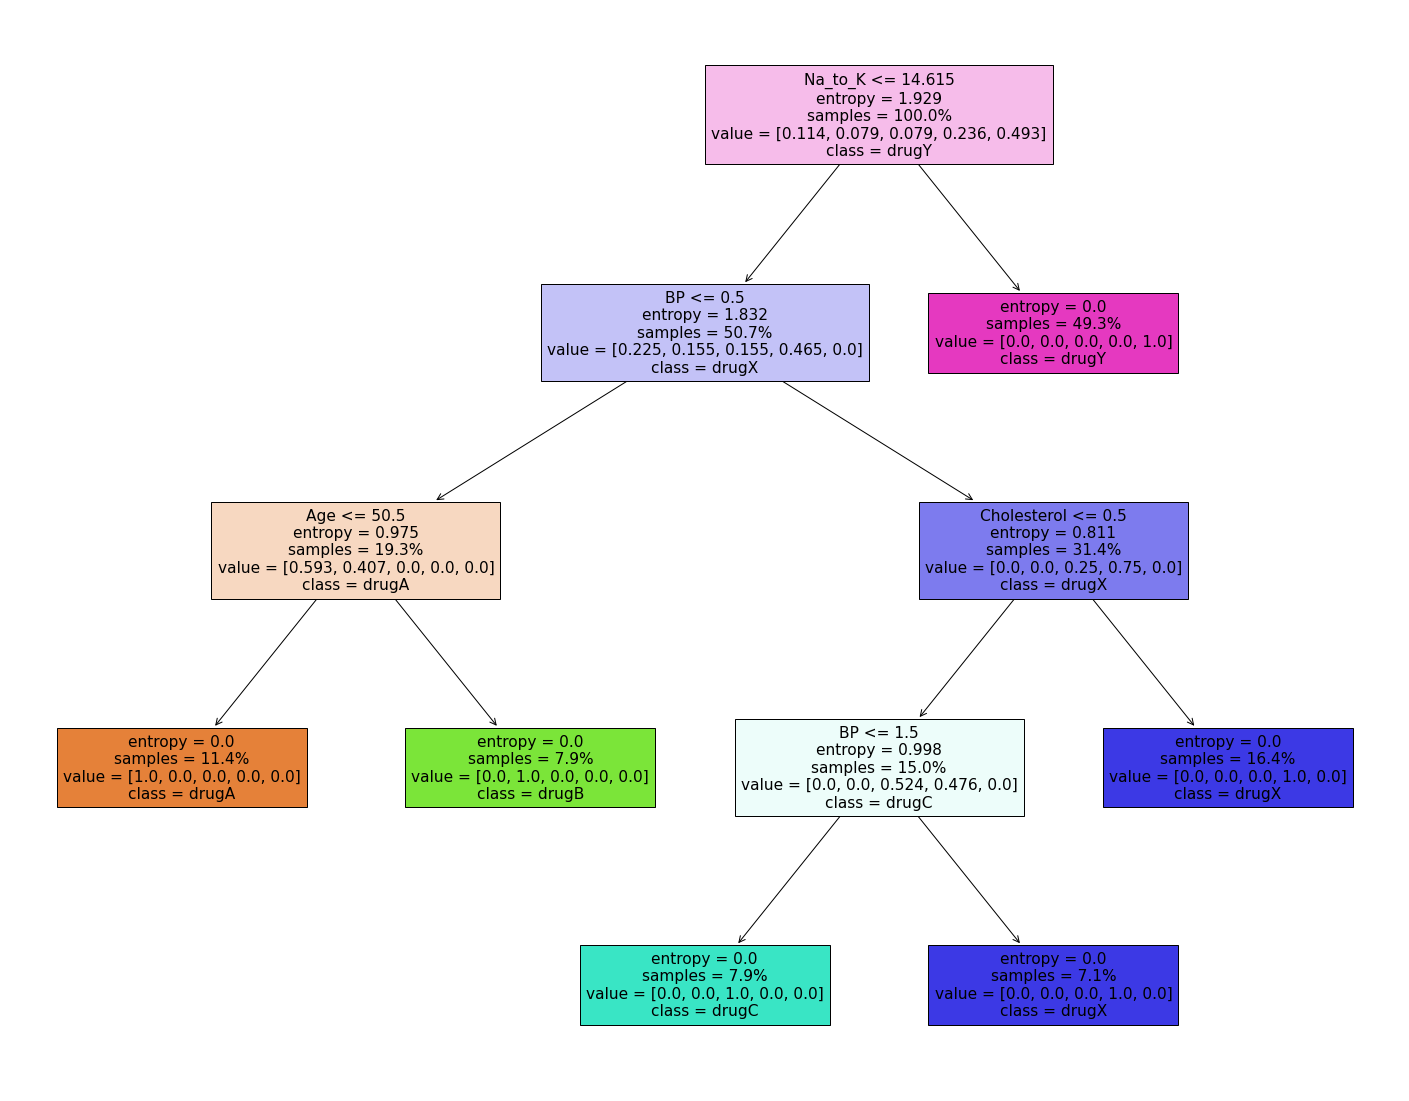

In [48]:
from matplotlib import pyplot as plt
from sklearn import tree
from  io import StringIO
import os

import pyparsing
import graphviz
import pydotplus
import matplotlib.image as mpimg
%matplotlib inline


featureNames = my_data.columns[0:5]
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(Drugtree, 
                   feature_names=featureNames,  
                   class_names= np.unique(y_train),
                   proportion= True, filled=True)


plt.savefig("Drugtree.png")





'''
dot_data = StringIO()

filename = "Drugtree.png"



out=tree.export_graphviz(Drugtree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')
'''

In [33]:
class_names


['drugA', 'drugB', 'drugC', 'drugX', 'drugY']

In [38]:
help(tree.plot_tree)

Help on function plot_tree in module sklearn.tree._export:

plot_tree(decision_tree, *, max_depth=None, feature_names=None, class_names=None, label='all', filled=False, impurity=True, node_ids=False, proportion=False, rotate='deprecated', rounded=False, precision=3, ax=None, fontsize=None)
    Plot a decision tree.
    
    The sample counts that are shown are weighted with any sample_weights that
    might be present.
    
    The visualization is fit automatically to the size of the axis.
    Use the ``figsize`` or ``dpi`` arguments of ``plt.figure``  to control
    the size of the rendering.
    
    Read more in the :ref:`User Guide <tree>`.
    
    .. versionadded:: 0.21
    
    Parameters
    ----------
    decision_tree : decision tree regressor or classifier
        The decision tree to be plotted.
    
    max_depth : int, optional (default=None)
        The maximum depth of the representation. If None, the tree is fully
        generated.
    
    feature_names : list of st